In [15]:
#!pip install transformers
import transformers
import matplotlib.pyplot as plt
import numpy as np
import torch

In [16]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests


url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

In [ ]:
# How to save a model

#model = YolosForObjectDetection.save_pretrained('test_model')
#model2 = YolosForObjectDetection.from_pretrained('testmodel')

In [3]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

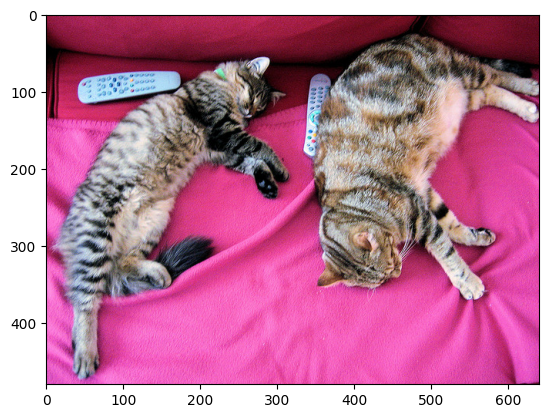

In [4]:
plt.imshow(image)

In [5]:
from transformers import pipeline

In [7]:
object_detector = pipeline('object-detection', model=model ,feature_extractor=feature_extractor)

In [9]:
results = object_detector(image)

/Users/kohmann/Documents/Studie/2022 Høst/Visual_intelligence/roadcrack-detection/venv/lib/python3.9/site-packages/transformers/models/yolos/feature_extraction_yolos.py:676: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


In [10]:
results

[{'score': 0.9994196891784668,
  'label': 'remote',
  'box': {'xmin': 335, 'ymin': 79, 'xmax': 375, 'ymax': 187}},
 {'score': 0.9790481328964233,
  'label': 'remote',
  'box': {'xmin': 40, 'ymin': 70, 'xmax': 182, 'ymax': 115}},
 {'score': 0.996350884437561,
  'label': 'cat',
  'box': {'xmin': 348, 'ymin': 18, 'xmax': 638, 'ymax': 369}},
 {'score': 0.9972134232521057,
  'label': 'couch',
  'box': {'xmin': 0, 'ymin': 0, 'xmax': 639, 'ymax': 475}},
 {'score': 0.9861295819282532,
  'label': 'cat',
  'box': {'xmin': 12, 'ymin': 56, 'xmax': 317, 'ymax': 466}}]

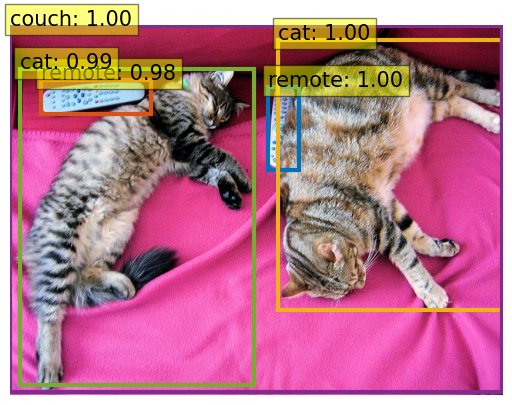

In [14]:
plot_results(image, results)